# Crowdedness Prediction SVM Regressor

# Goals

Given a time of day (and maybe some other features, including weather), predict how crowded the gym will be.
Figure out which features are actually important, which are redundant, and what features could be added to make the predictions more accurate.

# Data

The dataset consists of 26,000 people counts (about every 10 minutes) over the last year. In addition, I gathered extra info including weather and semester-specific information that might affect how crowded it is. The label is the number of people, which I'd like to predict given some subset of the features.

**Label:**

Number of people

**Features:**

* date (string; datetime of data)
* timestamp (int; number of seconds since beginning of day)
* dayofweek (int; 0 [monday] - 6 [sunday])
* is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0]
* is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]
* temperature (float; degrees fahrenheit)
* isstartof_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]
* month (int; 1 [jan] - 12 [dec])
* hour (int; 0 - 23)

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [4]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [5]:
df.isna().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

# Extract the training and test data

In [6]:
data = df.values

In [7]:
X = data[:, 2:9]
y = data[:, 0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
X_train[:3]

array([[10133, 6, 1, 0, 57.05, 0, 1],
       [41614, 4, 0, 0, 50.37, 0, 1],
       [80412, 6, 1, 0, 63.24, 0, 1]], dtype=object)

# Scale the data to be between -1 and 1

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train[:3]

array([[-1.47233467,  1.51458555,  1.59547406, -0.05014971, -0.24184652,
        -0.29182161,  0.71531015],
       [-0.17289197,  0.51147213, -0.62677296, -0.05014971, -1.29968502,
        -0.29182161,  0.71531015],
       [ 1.42857488,  1.51458555,  1.59547406, -0.05014971,  0.73839605,
        -0.29182161,  0.71531015]])

# Train the model

In [14]:
model = SVR(C=1, cache_size=500, epsilon=1, kernel='rbf')

In [15]:
model.fit(X_train, y_train)

SVR(C=1, cache_size=500, epsilon=1)

# Score the model

In [16]:
model.score(X_test, y_test)

0.6032448944647049

**Not a great score.**

# Try other epsilons - this will take about 5-10 minutes.

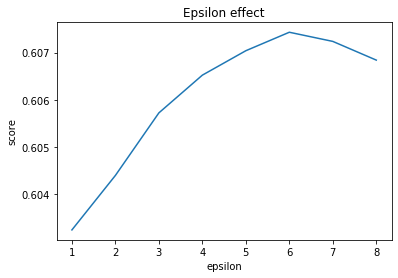

In [19]:
epsilons = [1, 2, 3, 4, 5, 6, 7, 8]
scores = []
for e in epsilons:
    model.set_params(epsilon=e)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(epsilons, scores)
plt.title("Epsilon effect")
plt.xlabel("epsilon")
plt.ylabel("score")
plt.show()

**Best value of eplison = 6**

# Try other C's - This will take about 5 minute or so

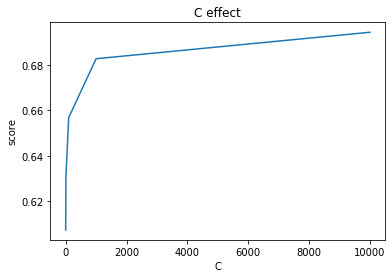

In [24]:
model.set_params(epsilon=6)
Cs = [1e0, 1e1, 1e2, 1e3, 1e4]
scores = []
for c in Cs:
    model.set_params(C=c)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(Cs, scores)
plt.title("C effect")
plt.xlabel("C")
plt.ylabel("score")
plt.show()

**Best value of C > 8000**

***Here we get accuracy around 70%. Can we go higher?***

# The End!